# Data & Apprentissage, M2CHPS 2023

## Assignments - Part 2

**Instructor:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).  
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse.html)

The most updated version of this file can be found at instructor's webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Assignments2.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Assignments1.ipynb).

## 0. Before you start

* This assignement has already few exercises and  will be completed 2 weeks before the final deadline. You can start working on them and get any update as you go.
* Work on the assignment either alone or in a team of two (pair). Students that will work alone will benefit from a 15% bonus. Important: The point in working in a pair is not to split the work, but to collaborate! 
* Prepare **a single jupiter notebook** in a report-like format for all the exercises. Use this notebook as a starting point and place your answers just below each exercise. Describe properly what you do in each step of your solution, followed by your well-commented code implementation that can automatically produce figures and numerical results. Results should also be well-commented and discussed. Your comments can be either in English or in French.
* If you need to provide mathematical expressions, incorporate all that in your notebook in a latex form (not handwritten!). 
* Important: send your notebook that includes all your work and any additional files you used (e.g. datasets) at by email, with a title ``M2CHPS <year> - <Surname1> & <Surname2>``. The title of the notebook should have the surnames of the students. The body of the email should also mention the students' names and how they split the work; if you face difficulties in clarifying this with your classmate, please write separate emails with your views. 
* Always use references for things you reuse (e.g. internet, forums, books, published papers, etc.)
* Do not copy-paste from the internet recipies that do the asked thing (or what is most usually observed: to use something relevant but not exactly what is asked). You need to understand what you use (sources should be properly referenced), adapt it to what each exercise asks for, and comment clearly the results. Poorly commented and explained pieces of work/code will not be taken seriously into account. 
* Copying from one another is not acceptable. We are strict with that: cheating in even one exercise will incur **a zero to all projects** (not just one assignement) and possible disqualification from the exams. Your work will be cross-checked against anything similar submitted from past students of the course.
* The assignments will be examined orally at the end of the semester. Each group of students should be able to explain in about 10 mins all what they did, and answer short questions.
* **Deadline: midnight of Sunday 1/12.**
* **Late submissions:** the maximum possible grade is penalized by 5%/day. E.g. when delivering on time the best grade is 20/20, late submission by one day gets at best 19/20, for two days late of delay 18/20...  
* **Slot for questions: Friday 15/11 at 14h**. Zoom link: https://kalogeratos.com/zoom. Meeting ID: 243 940 6970 -- Passcode: 15881598

## Exercise 1 [15%]

A security system relies on a battery ($b$), two sensors ($c$ and $d$), and an alarm ($a$). The random variables $a$, $b$, $c$ are binary, and $a=1$ when the alarm fires, $b=1$ when the battery functions properly, and $c=1$ and $d=1$ when the respective sensor functions properly. Otherwise, each variable takes the value $0$.

The architecture of the system is as follows: the battery provides power with independent cables to the two sensors, and the sensors feed information to the alarm that can then fire to signify a threat. Each sensor can operate even with only its internal power source that it is equipped with, but in that case it becomes much more sensitive to fail compared to when the external battery is functioning normally. 

The manual of the system says that the probability for the battery to fail is 0.1, and that each sensor fails with probability 0.01 when the battery is ok, and with 0.7 when the battery is not ok. 

Additionally, the manual also informs us that if at least one sensor works fine, then the alarm fires with probability 0.02. Otherwise the alarm fires with 30 times higher probability.

**a)** Draw the graphical model of the system involving the random variables.

**b)** Compute the joint probabilities $p(a,b,c,d)$ and $p(a,c)$. Also check if $c$ and $d$ are independent.

**c)** Suppose **the alarm is silent** and that we check that **only the sensor $d$ works properly**. What is the posterior of having a disfunctioning battery?

**d)** Compute the probability for the alarm to be silent, $p(a=0)$.

**e)** We know that when at least one sensor works fine then the alarm fires with 0.02 (which let's suppose it is as much as as it is normal), otherwise with 0.6. We want to know how many sensors should the system have (connected like $c$ and $d$ in the initial design) such that the total probability $p(a=1) < 0.05$.

**f)** Suppose **we don't hear any alarm** (with good ears!) and **we have no information about the sensors** functioning. What is the probability for the battery to be disfunctioning?

**g)** Implement a function that generates observations from the probabilistic model at the top. Then make simulations to confirm empirically the estimations you calculated by hand.

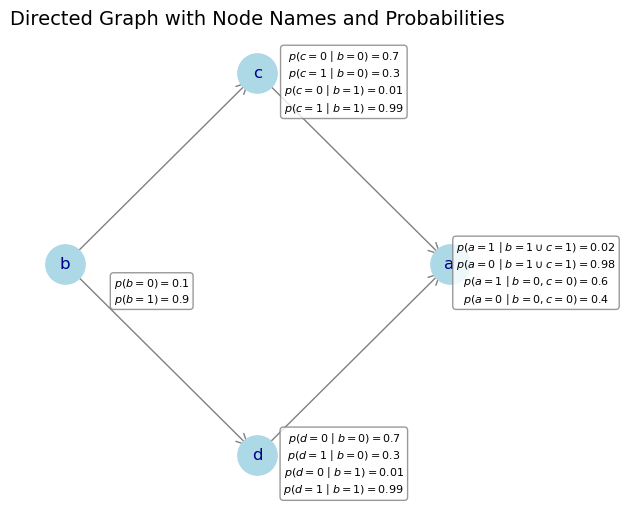

In [60]:
# (a) graphical model
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()
G.add_nodes_from(['a', 'b', 'c', 'd'])
G.add_edges_from([
    ('b', 'c'),
    ('b', 'd'),
    ('c', 'a'),
    ('d', 'a')
])

node_names = {node: node for node in G.nodes()}
probabilities = {
    'a': r'$p(a=1 \mid b=1 \cup c=1) = 0.02$' + '\n' + r'$p(a=0 \mid b=1 \cup c=1) = 0.98$' + '\n' + r'$p(a=1 \mid b=0, c=0) = 0.6$' + '\n' + r'$p(a=0 \mid b=0, c=0) = 0.4$',
    'b': r'$p(b=0) = 0.1$' + '\n' + r'$p(b=1) = 0.9$',
    'c': r'$p(c=0 \mid b=0) = 0.7$' + '\n' + r'$p(c=1 \mid b=0) = 0.3$' + '\n' + r'$p(c=0 \mid b=1) = 0.01$' + '\n' + r'$p(c=1 \mid b=1) = 0.99$',
    'd': r'$p(d=0 \mid b=0) = 0.7$' + '\n' + r'$p(d=1 \mid b=0) = 0.3$' + '\n' + r'$p(d=0 \mid b=1) = 0.01$' + '\n' + r'$p(d=1 \mid b=1) = 0.99$'
}
  
pos = {
    'a': (2, 1),  
    'b': (-2, 1),  
    'c': (0, 2),  
    'd': (0, 0)  
}

plt.figure(figsize=(6, 6))

nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='->', arrowsize=20, edge_color='gray')

nx.draw_networkx_labels(G, pos, labels=node_names, font_size=12, font_color='darkblue')


for node, (x, y) in pos.items():
    plt.text(
        x + 0.9, y - 0.2,  
        probabilities[node],
        fontsize=8,
        color='black',
        ha='center',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
    )

plt.title("Directed Graph with Node Names and Probabilities", fontsize=14)
plt.axis('off')
plt.show()


**(b)** calculate probabilities:

***(b1)*** check the independence of $c$ and $d$:
$$
p(c,d \mid b) = \frac{p(c,d,b)}{p(b)} = \frac{p(c \mid b) \times p(d \mid b) \times p(b)}{p(b)} = p(c \mid b) \times p(d \mid b)
$$
$c$ and $d$ are independent with a given value of $b$.

***(b2)*** we firstly compute $p(c)$ from the joint probability $p(b,c)$, as $p(c)=p(c \mid b=0) + p(c \mid b=1)$ and $p(b,c) = p(c \mid b) \times p(b)$:
$$
\begin{aligned}
p(c=0,b=0) &= p(c=0 \mid b=0) \times p(b=0) = 0.7 \times 0.1 = 0.07 \\
p(c=0,b=1) &= p(c=0 \mid b=1) \times p(b=1) = 0.01 \times 0.9 = 0.009 \\
p(c=1,b=0) &= p(c=1 \mid b=0) \times p(b=0) = (1-p(c=0 \mid b=0)) \times p(b=0) = (1-0.7) \times 0.1 = 0.03 \\
p(c=1,b=1) &= p(c=1 \mid b=1) \times p(b=1) = (1-p(c=0 \mid b=1)) \times p(b=1) = (1-0.01) \times 0.9 = 0.891 \\
p(c=0) &= p(c=0,b=0) + p(c=0,b=1) = 0.07 + 0.009 = 0.079 \\
p(c=1) &= p(c=1,b=0) + p(c=1,b=1) = 0.03 + 0.891 = 0.921
\end{aligned}
$$

as $d$ has the same behavior as $c$, we can easily obtain $p(d)$:
$$
\begin{aligned}
p(d=0,b=0) &= p(c=0,b=0) = 0.07 \\
p(d=0,b=1) &= p(c=0,b=1) = 0.009 \\
p(d=1,b=0) &= p(c=1,b=0) = 0.03 \\
p(d=1,b=1) &= p(c=1,b=1) = 0.891 \\
p(d=0) &= p(c=0) = 0.079 \\
p(d=1) &= p(c=1) = 0.921
\end{aligned}
$$

***(b3)*** we have: 
$$
p(a,b,c,d) = p(a \mid c,d,b) \times p(c,d,b) = p(a \mid c,d) \times p(c,d,b)
$$ 
because $a$ does not directly rely on $b$. 

with independence of $c$ and $d$: 
$$
p(c,d,b) = p(c,d \mid b) \times p(b) = p(c \mid b) \times p(d \mid b) \times p(b)
$$

then we have:
$$
p(a,b,c,d) = p(a \mid c,d) \times p(c \mid b) \times p(d \mid b) \times p(b)
$$

thus,
$$
\begin{aligned}
p(a=1,b=0,c=0,d=0) &= p(a=1 \mid c=0,d=0) \times p(c=0 \mid b=0) \times p(d=0 \mid b=0) \times p(b=0) \\
&= 0.6 \times 0.7 \times 0.7 \times 0.1 = 0.0294 \\
p(a=0,b=0,c=0,d=0) &= p(a=0 \mid c=0,d=0) \times p(c=0 \mid b=0) \times p(d=0 \mid b=0) \times p(b=0) \\
&= 0.4 \times 0.7 \times 0.7 \times 0.1 = 0.0196 \\
p(a=1,b=1,c=0,d=0) &= p(a=1 \mid c=0,d=0) \times p(c=0 \mid b=1) \times p(d=0 \mid b=1) \times p(b=1) \\
&= 0.6 \times 0.01 \times 0.01 \times 0.9 = 0.000054 \\
p(a=0,b=1,c=0,d=0) &= p(a=0 \mid c=0,d=0) \times p(c=0 \mid b=1) \times p(d=0 \mid b=1) \times p(b=1) \\
&= 0.4 \times 0.01 \times 0.01 \times 0.9 = 0.000036 
\end{aligned}
$$

the complement cases of $b=0,c=0$ are more complicated, we need to discompose the conditioned probability and, with the law of total probability and independence between $c$ and $d$, we get: 
$$
\begin{aligned}
p(a=1 \mid c=1 \cup d=1) &= p(a=1 \mid {c=1,d=0} \cup {c=1,d=1} \cup {c=0,d=1}) \\
&= p(a=1 \mid c=1,d=0) \times p(c=1,d=0 \mid c \cup d) + p(a=1 \mid c=1,d=1) \times p(c=1,d=1 \mid c \cup d) + p(a=1 \mid c=0,d=1) \times p(c=0,d=1 \mid c \cup d) \\
&= \frac{p(a=1,c=1,d=0) + p(a=1,c=1,d=1) + p(a=1,c=0,d=1)}{p(c=1) \times p(d=0) + p(c=1) \times p(d=1) + p(c=0) \times p(d=1)} \\
&= \frac{p(a=1,c=1,d=0) + p(a=1,c=1,d=1) + p(a=1,c=0,d=1)}{1 - p(c=0) \times p(d=0)} \\
&= \frac{p(a=1,c=1,d=0) + p(a=1,c=1,d=1) + p(a=1,c=0,d=1)}{1 - 0.079 \times 0.079} \\
&= 0.02
\end{aligned}
$$  

so,
$$
p(a=1,c=1,d=0) + p(a=1,c=1,d=1) + p(a=1,c=0,d=1) = 0.02 \times (1 - 0.079 \times 0.079) \approx 0.019875
$$


***(b4)*** then we calculate $p(a,c)$:

$$
\begin{aligned}
p(a,c) &= \sum_{b=0}^1 \sum_{d=0}^1 p(a,b,c,d) \\
p(a=0,c=0) &= p(a=0,b=0,c=0,d=0) + p(a=0,b=1,c=0,d=0) + p(a=0,b=0,c=0,d=1) + p(a=0,b=1,c=0,d=1) \\
&=  \\
p(a=1,c=0) &= p(a=1,b=0,c=0,d=0) + p(a=1,b=1,c=0,d=0) + p(a=1,b=0,c=0,d=1) + p(a=1,b=1,c=0,d=1) \\
&=  \\
p(a=0,c=1) &= p(a=0,b=0,c=1,d=0) + p(a=0,b=1,c=1,d=0) + p(a=0,b=0,c=1,d=1) + p(a=0,b=1,c=1,d=1) \\
&=  \\
p(a=1,c=1) &= p(a=1,b=0,c=1,d=0) + p(a=1,b=1,c=1,d=0) + p(a=1,b=0,c=1,d=1) + p(a=1,b=1,c=1,d=1) \\
&=  \\
\end{aligned}
$$

**(c)** we can apply the Bayes' Theorem and then use the calculated values from question (b): 

$$
\begin{aligned}
p(b=0 \mid a=0,c=0,d=1) &= \frac{p(b=0) \times p(a=0,c=0,d=1 \mid b=0)}{p(a=0,c=0,d=1)} \\
&= \frac{p(b=0) \times p(a=0,c=0,d=1,b=0)}{p(a=0,c=0,d=1) \times p(b=0)} \\
&= \frac{p(a=0,c=0,d=1,b=0)}{p(a=0,c=0,d=1)} \\
&= \frac{}{} = \approx
\end{aligned}
$$ 

**(d)**

$$
\begin{aligned}
p(a=0) &= \sum_{b=0}^1 \sum_{c=0}^1 \sum_{d=0}^1 p(a=0,b,c,d) \\
&= p(a=0,b=0,c=0,d=0) + p(a=0,b=1,c=0,d=0) + p(a=0,b=0,c=1,d=0) + p(a=0,b=0,c=0,d=1) + p(a=0,b=0,c=1,d=1) + p(a=0,b=1,c=1,d=0) + p(a=0,b=1,c=0,d=1) + p(a=0,b=1,c=1,d=1) \\
&= 0.0196 + 0.000036 +    =
\end{aligned}
$$

**(e)**

$p(a=1) < 0.05$

**(f)**

$p(b=0 \mid a=0) = \frac{p(b=0) \times p(a=0 \mid b=0)}{p(a=0)} $

In [ ]:
# (g) probabilistic simulation
import numpy as np

def generate_observation():
    # Step 1: Determine battery status (b)
    b = np.random.choice([1, 0], p=[0.9, 0.1])
    
    # Step 2: Determine sensor status (c and d) based on battery status
    if b == 1:  # Battery is functioning
        c = np.random.choice([1, 0], p=[0.99, 0.01])
        d = np.random.choice([1, 0], p=[0.99, 0.01])
    else:  # Battery is not functioning
        c = np.random.choice([1, 0], p=[0.3, 0.7])
        d = np.random.choice([1, 0], p=[0.3, 0.7])
    
    # Step 3: Determine alarm status (a) based on sensor statuses
    if c == 1 or d == 1:  # At least one sensor works
        a = np.random.choice([1, 0], p=[0.02, 0.98])
    else:  # Both sensors are not working
        a = np.random.choice([1, 0], p=[0.6, 0.4])
    
    return a, b, c, d

# Simulate a large number of observations
def simulate_observations(num_samples):
    observations = [generate_observation() for _ in range(num_samples)]
    return np.array(observations)

# Example: Simulate 10000 samples
num_samples = 10000
simulated_data = simulate_observations(num_samples)

# Calculate empirical probabilities
prob_a_0 = np.mean(simulated_data[:, 0] == 0)
prob_b_0 = np.mean(simulated_data[:, 1] == 0)
prob_b_1_given_a_0 = np.mean((simulated_data[:, 1] == 1) & (simulated_data[:, 0] == 0))

print(f"Empirical probability P(a=0): {prob_a_0:.4f}")
print(f"Empirical probability P(b=0): {prob_b_0:.4f}")
print(f"Empirical probability P(b=1 | a=0): {prob_b_1_given_a_0:.4f}")


## Exercise 2 - [30%]

**Isolation Forests (IF)** are efficient in identifying global outliers. IF can provide with an outlier index for each datapoint included in a given dataset; let that be denoted by **IF_index**. 

On the other hand, [**Local Outlier Factor (LOF)**](https://en.wikipedia.org/wiki/Local_outlier_factor) identifies efficiently local outliers, although it's computationally demanding for large datasets, and is theoretically weaker as dimensions grow larger due to relying on density-based calculations (recall the *curse of dimensionality*). Before giving the questions of the exercise, let's see the details of computing LOF (see the updated Lab3 file for technical explanations about how to compute LOF in practice).

For this exercise you are asked the following:

**a)** Implement your own version of LOF and demonstrate a comparison with the built-in version of scikit-learn using the example we saw in the lab. Plot in a meaningful way the differences between the LOF index you compute for each point and what the built-in version gives. (note: since there are different LOF variants, there is the possibility that your correct implementation may give slightly different index values, but this is ok).

**b)** Investigate and propose a way to combine LOF with IF. More specifically, a way to introduce to the computations of the LOF method the IF_index we mentioned at the top of the description. 

**c)** Provide a meaningful demonstration with several examples that compare LOF, IF, and the hybrid LOF+IF.

**References:**
M.M. Breunig et al. [LOF: Identifying Density-Based Local Outliers](https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf), Proc. ACM SIGMOD Int. Conf. On Management of Data, 2000.

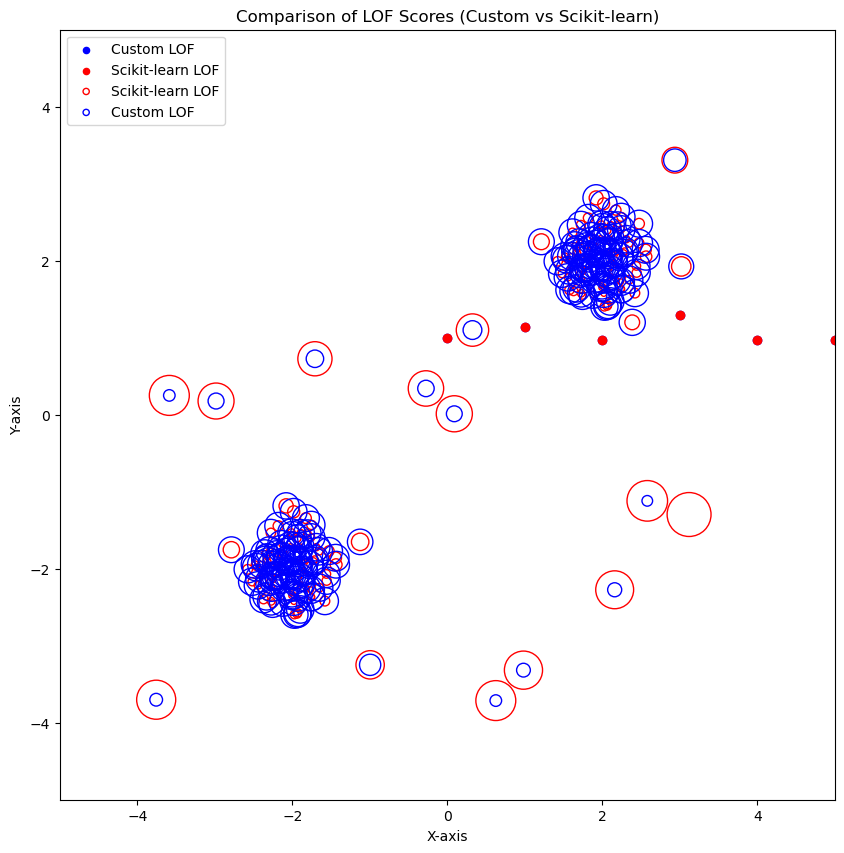

Mean difference between custom LOF and sklearn LOF: 2.8307829607951183
Max difference: 16.235815604055063


In [26]:
# (a) LOF implement using data set from lab3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor

def custom_lof(X, n_neighbors=20):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    k_distances = distances[:, 1:] 
    neighbors = indices[:, 1:]

    reach_dist_array = np.zeros_like(k_distances)
    for i in range(len(X)):
        for j in range(n_neighbors):
            neighbor_idx = neighbors[i, j]
            reach_dist_array[i, j] = max(k_distances[i, j], k_distances[neighbor_idx, -1])

    lrd = n_neighbors / np.sum(reach_dist_array, axis=1)

    lof_scores = np.zeros_like(lrd)
    for i in range(len(X)):
        lof_scores[i] = np.sum(lrd[neighbors[i]] / lrd[i]) / n_neighbors

    return lof_scores

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_sklearn = clf.fit_predict(X)
lof_scores_sklearn = clf.negative_outlier_factor_

lof_scores_custom = custom_lof(X, n_neighbors=20)

plt.figure(figsize=(10, 10))
plt.title("Comparison of LOF Scores (Custom vs Scikit-learn)")
plt.scatter(range(len(X)), lof_scores_custom, color='blue', label='Custom LOF')
plt.scatter(range(len(X)), -lof_scores_sklearn, color='red', label='Scikit-learn LOF')

radius_sklearn = (lof_scores_sklearn.max() - lof_scores_sklearn) / (
    lof_scores_sklearn.max() - lof_scores_sklearn.min()
)
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius_sklearn,
    edgecolors="r",
    facecolors="none",
    label="Scikit-learn LOF",
)

radius_custom = (lof_scores_custom.max() - lof_scores_custom) / (
    lof_scores_custom.max() - lof_scores_custom.min()
)
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=400 * radius_custom,
    edgecolors="b",
    facecolors="none",
    label="Custom LOF",
)

plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
legend = plt.legend(loc="upper left")
for handle in legend.legend_handles:
    handle._sizes = [20]
plt.show()

diff = np.abs(lof_scores_sklearn - lof_scores_custom)
print("Mean difference between custom LOF and sklearn LOF:", np.mean(diff))
print("Max difference:", np.max(diff))


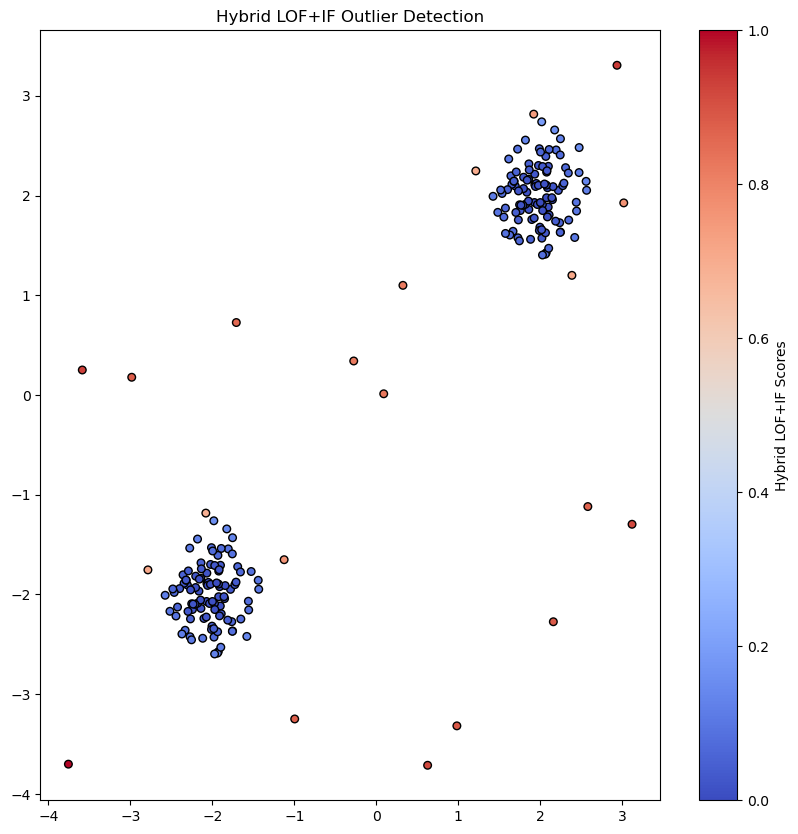

In [30]:
# (b) LOF + IF
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

def hybrid_lof_if(X, n_neighbors=20, contamination=0.1, alpha=0.5):
    # Step 1: Compute IF Index
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)
    isolation_forest.fit(X)
    if_scores = -isolation_forest.decision_function(X)  # IF Index (higher means more abnormal)
    if_scores = MinMaxScaler().fit_transform(if_scores.reshape(-1, 1)).flatten()  # Normalize to [0, 1]
    
    # Step 2: Compute LOF Scores
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    lof_scores = -lof.fit_predict(X)  # Negative LOF scores (higher means more abnormal)
    lof_scores = MinMaxScaler().fit_transform(lof_scores.reshape(-1, 1)).flatten()  # Normalize to [0, 1]
    
    # Step 3: Combine Scores
    hybrid_scores = alpha * lof_scores + (1 - alpha) * if_scores
    
    return if_scores, lof_scores, hybrid_scores

# Example usage with synthetic data
np.random.seed(42)

# Generate synthetic dataset
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Compute hybrid LOF + IF scores
if_scores, lof_scores, hybrid_scores = hybrid_lof_if(X, n_neighbors=20, contamination=0.1, alpha=0.5)

# Visualize results
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=hybrid_scores, cmap='coolwarm', s=30, edgecolors='k')
plt.colorbar(label="Hybrid LOF+IF Scores")
plt.title("Hybrid LOF+IF Outlier Detection")
plt.show()


KeyboardInterrupt: 

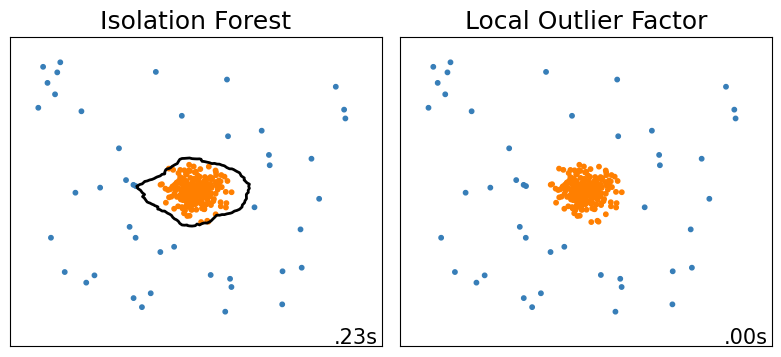

In [48]:
# (c) demonstration with similar method in lab3
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Define hybrid method
def hybrid_lof_if(X, n_neighbors=20, contamination=0.1, alpha=0.5):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.ensemble import IsolationForest

    # Isolation Forest (IF)
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)
    isolation_forest.fit(X)
    if_scores = -isolation_forest.decision_function(X)
    if_scores = MinMaxScaler().fit_transform(if_scores.reshape(-1, 1)).flatten()

    # Local Outlier Factor (LOF)
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    lof_scores = -lof.fit_predict(X)
    lof_scores = MinMaxScaler().fit_transform(lof_scores.reshape(-1, 1)).flatten()

    # Combine scores
    hybrid_scores = alpha * lof_scores + (1 - alpha) * if_scores

    # Determine threshold dynamically
    threshold = np.percentile(hybrid_scores, 85)  # e.g., top 15% as outliers
    y_pred = np.where(hybrid_scores >= threshold, -1, 1)
    return y_pred, hybrid_scores


# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare IF, LOF, and Hybrid on datasets
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(12, len(datasets) * 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.3)

plot_num = 1
rng = np.random.RandomState(42)

methods = [
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction, random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)),
    ("Hybrid LOF+IF", None)  # Placeholder for custom implementation
]

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in methods:
        t0 = time.time()
        
        if name == "Hybrid LOF+IF":
            # Use the custom hybrid method
            y_pred, hybrid_scores = hybrid_lof_if(
                X, n_neighbors=35, contamination=outliers_fraction, alpha=0.5
            )
            # Compute scores for grid points
            grid_scores = []
            for point in np.c_[xx.ravel(), yy.ravel()]:
                _, scores = hybrid_lof_if(
                    np.vstack([X, point]),  # Add grid point to dataset
                    n_neighbors=35,
                    contamination=outliers_fraction,
                    alpha=0.5,
                )
                grid_scores.append(scores[-1])  # Last score corresponds to grid point
            Z = np.array(grid_scores).reshape(xx.shape)
        elif name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
            Z = None  # LOF does not provide decision function
        else:
            y_pred = algorithm.fit(X).predict(X)
            Z = algorithm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        t1 = time.time()

        plt.subplot(len(datasets), len(methods), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # Plot the decision boundary
        if Z is not None:
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        # Plot results
        colors = np.array(['#377eb8', '#ff7f00'])  # Blue for inliers, orange for outliers
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


## Exercise 3 - [45%]

As opposed to bottom-up clustering approaches, a top-down method starts with one cluster -a model with one component- and tries incrementally to increase the number of clusters by introducing and fitting more components in the model. The general algorithm goes as follows:

* **Initialization:** start with $k$=1 component model, $M_k$
* **Step 1:** fit the model $M_k$
* **Step 2:** find a good way to introduce and initialize a new component; set $k=k+1$ and go to Step 1 

There are many ways to make more specific the steps of this process. 

**Model:** one can pick a cluster model, e.g. a centroid-based like that of k-means, or a probabilistic model like the Gaussian Mixture Models (GMM). In both cases an iterative approach takes place when fitting such a model.

**Incremental step:** Most importantly, one needs to decide about how Step 2 operates. Indicative options originally expressed using $k$-means are:
* **Bisecting:** This approach chooses one cluster and splits it in two parts. The criterion of which cluster to pick varies; one simple way is to choose the cluster with the largest error (or average error). In the case of k-means, which uses a hard assignment of points to clusters, this is:
  
    - B1) Initialize a second centroid using a random point of the cluster.   
    - B2) Run a 2-means inside the cluster using only the points of that cluster.     
    - B3) (Optionally) A full k-means fine-tuning to update all the $k+1$ clusters can be performed.     
    Note that, if step B3 is not involved, 2 of the centroids are the product of the cluster splitting, while the rest come untouched from the previous $k$-order solution.
* **Global:** In its greedy version (see if needed the reference), this approach examines as the ($k+1$)-th centroid every of the $N$ points of the dataset, and in each case it fits a different $k+1$ model with ($k+1$)-means. Out of all the $N$ trials, it chooses the model that produced the maximal reduction of the clustering error (in fact it doesn't need to store the models, but only to rerun the best case found).
* **Fast Global:** It is a variation of Global k-means that initializes the $k+1$-th centroid with the point that achieves the largest reduction of error only after one k-means update, i.e. after considering it as new centroid and looking which other points would be assigned to that new cluster, and without iterating further till convergence.
* **Global++:** Instead of checking all $N$ points as candidates for initializing the $k+1$-th centroid, here the k-means++ principle is used. Specifically, the $k+1$ centroid is initialized by choosing at random one point based on the distribution of the inverse sum of distances of each point to the $k$ computed centroids. This should be repeated $m<N$ times (where $m$ is a parameter, e.g. $m=\lfloor 0.1*N \rfloor$) and pick the best choice.

**Recipe to prepare**

Consider that the final number of clusters $k^*$ is known in each case. First, use $k$-means as base algorithm, then extend to GMM as described below.

**a)** Implement the greedy global incremental, the fast global, and the global++ variations.

**b)** Which property of the solution produced by the bisecting variation does not hold any more, when including Step B3 and after applying it? Compare with the global incremental approach with regards to the same property?

**c)** Run experiments for the color clustering application we saw in the course (with given $k^*$ as in that example).

**d)** Construct a random synthetic dataset as follows. Consider a 5-by-5 2D grid arrangement of 25 clusters: i.e. the mean of the 1st cluster will be at (0,5), the 2nd at (1,5),..., the 6th at (0,4),..., the 25th at (5,0)). Each cluster will have $N=50$ points in 2D generated by a Gaussian distribution, with fixed $\sigma$ for all clusters (test values $\sigma = ${0.1, 0.5, 0.7, 1}). Run experiments with all your implementations (i.e. flat GMM training with fixed $k$; incremental GMM training with bisecting splits; incremental GMM training based on the global principle). Provide summaries of results about the clustering error and detailed comments with your observations/interpretations about the performance of the methods.

**e)** Now, extend your toolbox by also considering the GMM as base algorithm. You will need a piece of code implementing the GMM training with a fixed $k$ using the Expectation-Maximization (EM) algorithm. 

**f)** What is the main problem of applying the bisecting principle in the GMM case? Find a heuristic workaround to adapt it to this probabilistic cluster model.

**References:** 
- A. Likas et al., [The global k-means algorithm](https://hal.inria.fr/inria-00321515/document). Pattern Recognition, 2003.
- G. Vardakas et al., [Global k-means++: an effective relaxation of the global k-means clustering algorithm](https://arxiv.org/pdf/2211.12271), 2022.

## Exercise 4 - [10%]

Given a dataset $X = \{x_1,...,x_N\}$, $x_i \in \mathbb{R}^d$ and a distance measure computed by the function $dist(x_i, x_j) : X \times X \mapsto \mathbb{R}$, one can define a procedure that *reweights* the distances as: 
$$
    dist'(x_i, x_j) = w_{ij} * dist(x_i, x_j)
$$
where $w_{ij} \in \mathbb{R}^+$. The aim is to bring datapoints that are related closer and to distanciate others that are less related. 

* **Kernels:** A typical low-level approach used is by employing a kernel, e.g. the RBF-kernel (radial basis function) 
    $$w_{ij} := 1 / (1+RBFkernel(x_i, x_j)) = 1 / (1 + \exp(-\gamma \Vert x_i - x_j \Vert^2_2))$$
where $\gamma = \frac{1}{2\sigma^2}$. 

* **Cluster-based:** Alternatively, cluster-based high-level approaches can be employed. The idea is that we could cluster the dataset and exploit its cluster structure to determine a better $w_{ij}$. 
    * Flat clustering (e.g. $k$-means): Generate one or more clustering results and compute the frequency the two datapoints $x_i$ and $x_j$ get clustered together. 
    * Hierarchical clustering (e.g. HAC or bisecting $k$-means): Given the learned cluster hierarchy, we could define the proximity between two datapoints $x_i$ and $x_j$ based on the depth in the hierarchy (let that be $h_{ij}$) at which they get separated. 
    * Incremental clustering (e.g. global $k$-means): (deliberately not explained how this would work).
    
For this exercise, you will need to: 

a) Implement the above concepts and approaches: the simple kernel-based approach, and the three cluster-based approaches. For the incremental clustering one, you will need to devise a way to build a meaningful measure.

b) Use generated synthetic data, like those in the previous exercise, to demonstrate the correctness of your implementation and the behavior of the approaches. 


== RBF Kernel ==
Original Distance:
 [[0.         0.1786471  0.14306129 0.20869372 0.53118409 0.30612356
  0.2112843  0.7891329  0.54148195 0.27670999]
 [0.1786471  0.         0.20562852 0.3842079  0.39536284 0.18963685
  0.38229325 0.70162138 0.64973151 0.36942074]
 [0.14306129 0.20562852 0.         0.2462733  0.60040816 0.38621822
  0.31477278 0.66072543 0.44455307 0.41940497]
 [0.20869372 0.3842079  0.2462733  0.         0.73154383 0.50704448
  0.13477076 0.8842009  0.42153982 0.34126404]
 [0.53118409 0.39536284 0.60040816 0.73154383 0.         0.2252094
  0.67115269 0.94052292 1.04491552 0.52073358]
 [0.30612356 0.18963685 0.38621822 0.50704448 0.2252094  0.
  0.45541762 0.84531028 0.82913891 0.34138697]
 [0.2112843  0.38229325 0.31477278 0.13477076 0.67115269 0.45541762
  0.         0.97470248 0.55566014 0.21734021]
 [0.7891329  0.70162138 0.66072543 0.8842009  0.94052292 0.84531028
  0.97470248 0.         0.74722058 1.05495271]
 [0.54148195 0.64973151 0.44455307 0.42153982 1.0449

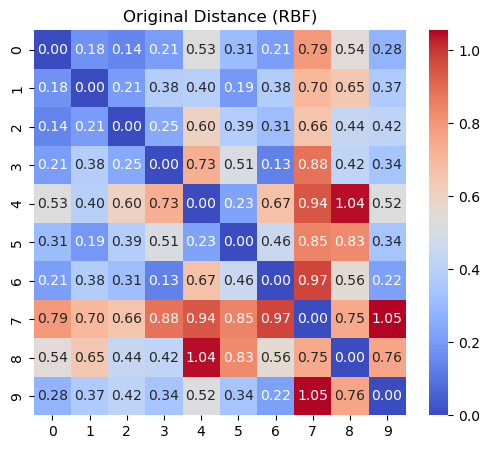

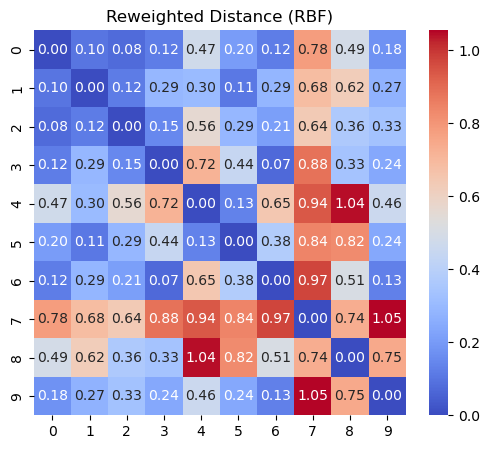

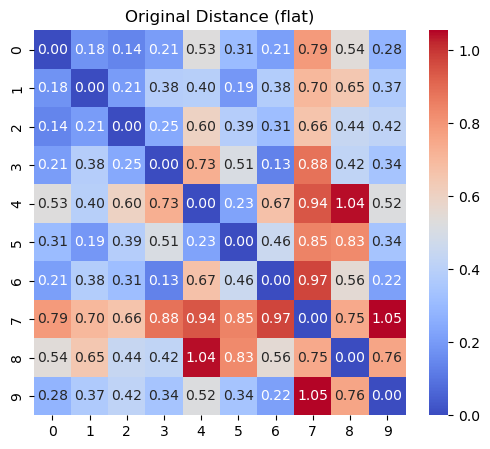

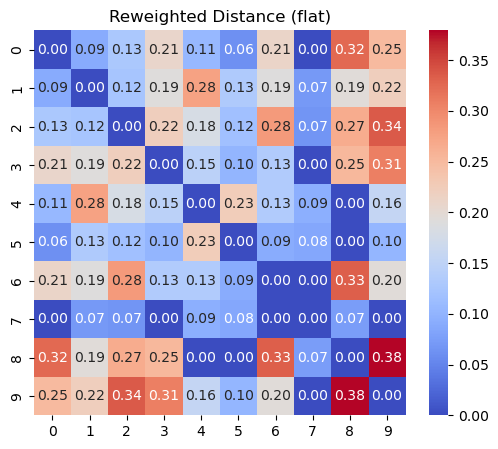

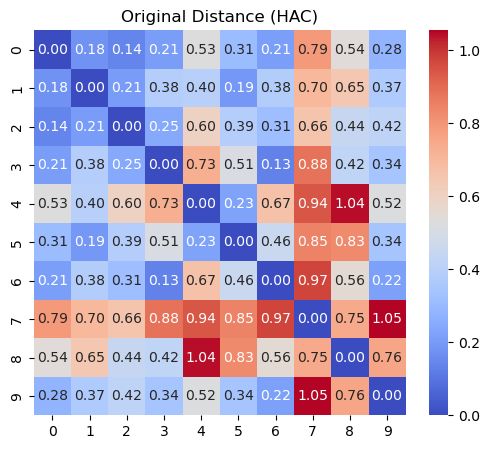

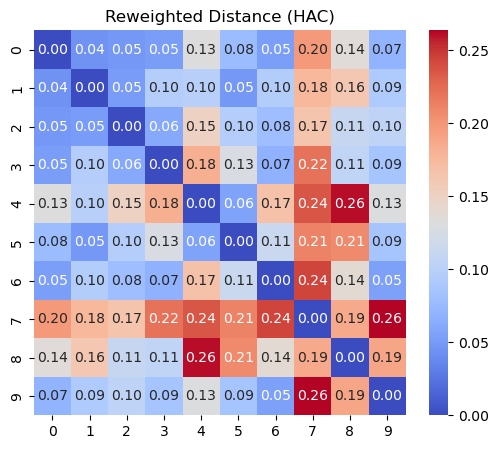

In [13]:
# (a) implement approaches
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

def rbf_kernel_weight(X):
    D = euclidean_distances(X, X)
    
    triu_indices = np.triu_indices_from(D, k=1)  
    sigma = np.std(D[triu_indices])  
    gamma = 1 / (2 * sigma**2)  
    
    W = 1 / (1 + np.exp(-gamma * D**2))
    D_prime = W * D  
    return D, W, D_prime, sigma, gamma

def flat_clustering_weight(X, n_clusters=3, n_runs=10):
    N = X.shape[0]
    co_occurrence_matrix = np.zeros((N, N))
    
    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(X)
        labels = kmeans.labels_
        for i in range(N):
            for j in range(N):
                if labels[i] == labels[j]:
                    co_occurrence_matrix[i, j] += 1

    W = co_occurrence_matrix / n_runs  
    D = euclidean_distances(X, X) 
    D_prime = W * D 
    return D, W, D_prime

def hierarchical_clustering_weight(X, method='single'):
    N = X.shape[0]
    Z = linkage(X, method=method)  
    dendro = dendrogram(Z, no_plot=True)
    leaves_order = dendro['leaves']
    
    depth_matrix = np.zeros((N, N))
    for i in range(len(Z)):
        cluster1 = int(Z[i, 0])
        cluster2 = int(Z[i, 1])
        depth = i + 1
        if cluster1 < N and cluster2 < N:  
            depth_matrix[cluster1, cluster2] = depth
            depth_matrix[cluster2, cluster1] = depth
        else:
            for leaf1 in leaves_order:
                for leaf2 in leaves_order:
                    if leaf1 == leaf2:
                        continue
                    if depth_matrix[leaf1, leaf2] == 0:
                        depth_matrix[leaf1, leaf2] = depth
                        depth_matrix[leaf2, leaf1] = depth

    W = 1 / (1 + depth_matrix)  
    D = euclidean_distances(X, X)  
    D_prime = W * D  
    return D, W, D_prime

np.random.seed(0)
X = np.random.rand(10, 2)  

D_rbf, W_rbf, D_prime_rbf, sigma, gamma = rbf_kernel_weight(X)

n_clusters = 3
n_runs = 10
D_flat, W_flat, D_prime_flat = flat_clustering_weight(X, n_clusters, n_runs)

method = 'single'  
D_hier, W_hier, D_prime_hier = hierarchical_clustering_weight(X, method)

print("== RBF Kernel ==")
print("Original Distance:\n", D_rbf)
print("Weights:\n", W_rbf)
print("Reweighted Distance:\n", D_prime_rbf)

print("\n== Flat Clustering ==")
print("Original Distance:\n", D_flat)
print("Weights:\n", W_flat)
print("Reweighted Distance:\n", D_prime_flat)

print("\n== Hierarchical Clustering ==")
print("Original Distance:\n", D_hier)
print("Weights:\n", W_hier)
print("Reweighted Distance:\n", D_prime_hier)

def plot_distance_matrix(D, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(D, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title)
    plt.show()

plot_distance_matrix(D_rbf, "Original Distance (RBF)")
plot_distance_matrix(D_prime_rbf, "Reweighted Distance (RBF)")

plot_distance_matrix(D_flat, "Original Distance (flat)")
plot_distance_matrix(D_prime_flat, "Reweighted Distance (flat)")

plot_distance_matrix(D_hier, "Original Distance (HAC)")
plot_distance_matrix(D_prime_hier, "Reweighted Distance (HAC)")

In [ ]:
# (b) check correctness